In [4]:
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('construct_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Project_ID      750 non-null    object 
 1   Land_Size_Sqm   750 non-null    float64
 2   Num_Of_Floors   750 non-null    int64  
 3   Tons_Of_Cement  750 non-null    float64
 4   Labor_Required  750 non-null    int64  
 5   Start_Date      750 non-null    object 
 6   End_Date        750 non-null    object 
 7   Num_Of_Bricks   750 non-null    int64  
 8   Tons_Of_Iron    750 non-null    float64
 9   Tons_Of_Sand    750 non-null    float64
 10  Total_Cost      750 non-null    float64
dtypes: float64(5), int64(3), object(3)
memory usage: 64.6+ KB


In [7]:
titles=df.iloc[:,0:]
titles

,Project_ID,Land_Size_Sqm,Num_Of_Floors,Tons_Of_Cement,Labor_Required,Start_Date,End_Date,Num_Of_Bricks,Tons_Of_Iron,Tons_Of_Sand,Total_Cost
0,P-1,1267.59,5,17.5,25,2023-11-24,2023-12-24,19013,10.0,43.75,1094703.0
1,P-2,1737.49,2,7.0,10,2023-05-06,2023-06-05,26062,4.0,17.50,548622.0
2,P-3,3910.80,9,31.5,45,2023-12-13,2024-01-21,58662,18.0,78.75,2117097.0
3,P-4,3280.07,1,5.0,5,2023-02-14,2023-03-18,49201,2.0,12.50,531456.0
4,P-5,1193.52,4,14.0,20,2023-01-16,2023-02-15,17902,8.0,35.00,891912.0
...,...,...,...,...,...,...,...,...,...,...,...
745,P-746,3246.34,10,35.0,50,2023-06-04,2023-07-06,48695,20.0,87.50,2253420.0
746,P-747,1898.52,6,21.0,30,2023-01-06,2023-02-05,28477,12.0,52.50,1347612.0
747,P-748,1792.47,2,7.0,10,2023-12-21,2024-01-20,26887,4.0,17.50,553572.0
748,P-749,2088.59,7,24.5,35,2023-08-27,2023-09-26,31328,14.0,61.25,1560843.0


In [8]:
df['End_Date'] = pd.to_datetime(df['End_Date'], format="%Y-%m-%d")
df['Start_Date']=pd.to_datetime(df['Start_Date'],format="%Y-%m-%d")
df['No.of days']=df['End_Date']-df['Start_Date']
df['Days'] = df['No.of days'].dt.days
df = df.drop('No.of days', axis=1)

In [9]:
x=df[['Land_Size_Sqm','Num_Of_Floors']]
y=df.iloc[:, 3:]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
x_train

,Land_Size_Sqm,Num_Of_Floors
595,3697.01,6
131,1638.21,8
44,4881.93,3
70,2610.41,7
672,1108.83,9
...,...,...
71,2761.50,1
106,2070.57,9
270,3408.31,10
435,2547.16,2


In [12]:
y_train=y_train.drop(['Start_Date','End_Date'],axis=1)
y_test=y_test.drop(['Start_Date','End_Date'],axis=1)

**XGBoost** Model

In [14]:
import xgboost as xgb

In [15]:
model = xgb.XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
y_pred=model.predict(x_test)

In [17]:
x_test

,Land_Size_Sqm,Num_Of_Floors
506,2905.74,1
357,4585.08,9
133,899.39,4
250,3843.26,9
299,3582.85,7
...,...,...
462,3580.14,8
90,1038.89,9
393,1786.16,9
685,3035.83,10


In [19]:
df_pred['Labor_Required']=df_pred['Labor_Required'].round()
df_pred['Num_Of_Bricks']=df_pred['Num_Of_Bricks'].round()

In [29]:
df_pred= pd.DataFrame(y_pred, columns=[ 'Tons_Of_Cement','Labor_Required','Num_Of_Bricks','Tons_Of_Iron','Tons_Of_Sand','Total_Cost','Days'])

In [30]:
df_pred['Total_Cost'] = df_pred['Total_Cost'].astype(int)

In [31]:
df_custom= pd.DataFrame(model.predict([[123,4]]))
df_custom

,0,1,2,3,4,5,6
0,14.000132,20.000006,12471.310547,7.461279,34.99984,813868.1875,29.999922


Evaluation Matrix

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2 = r2_score(y_test, df_pred)*100
r2

99.96484448894348

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

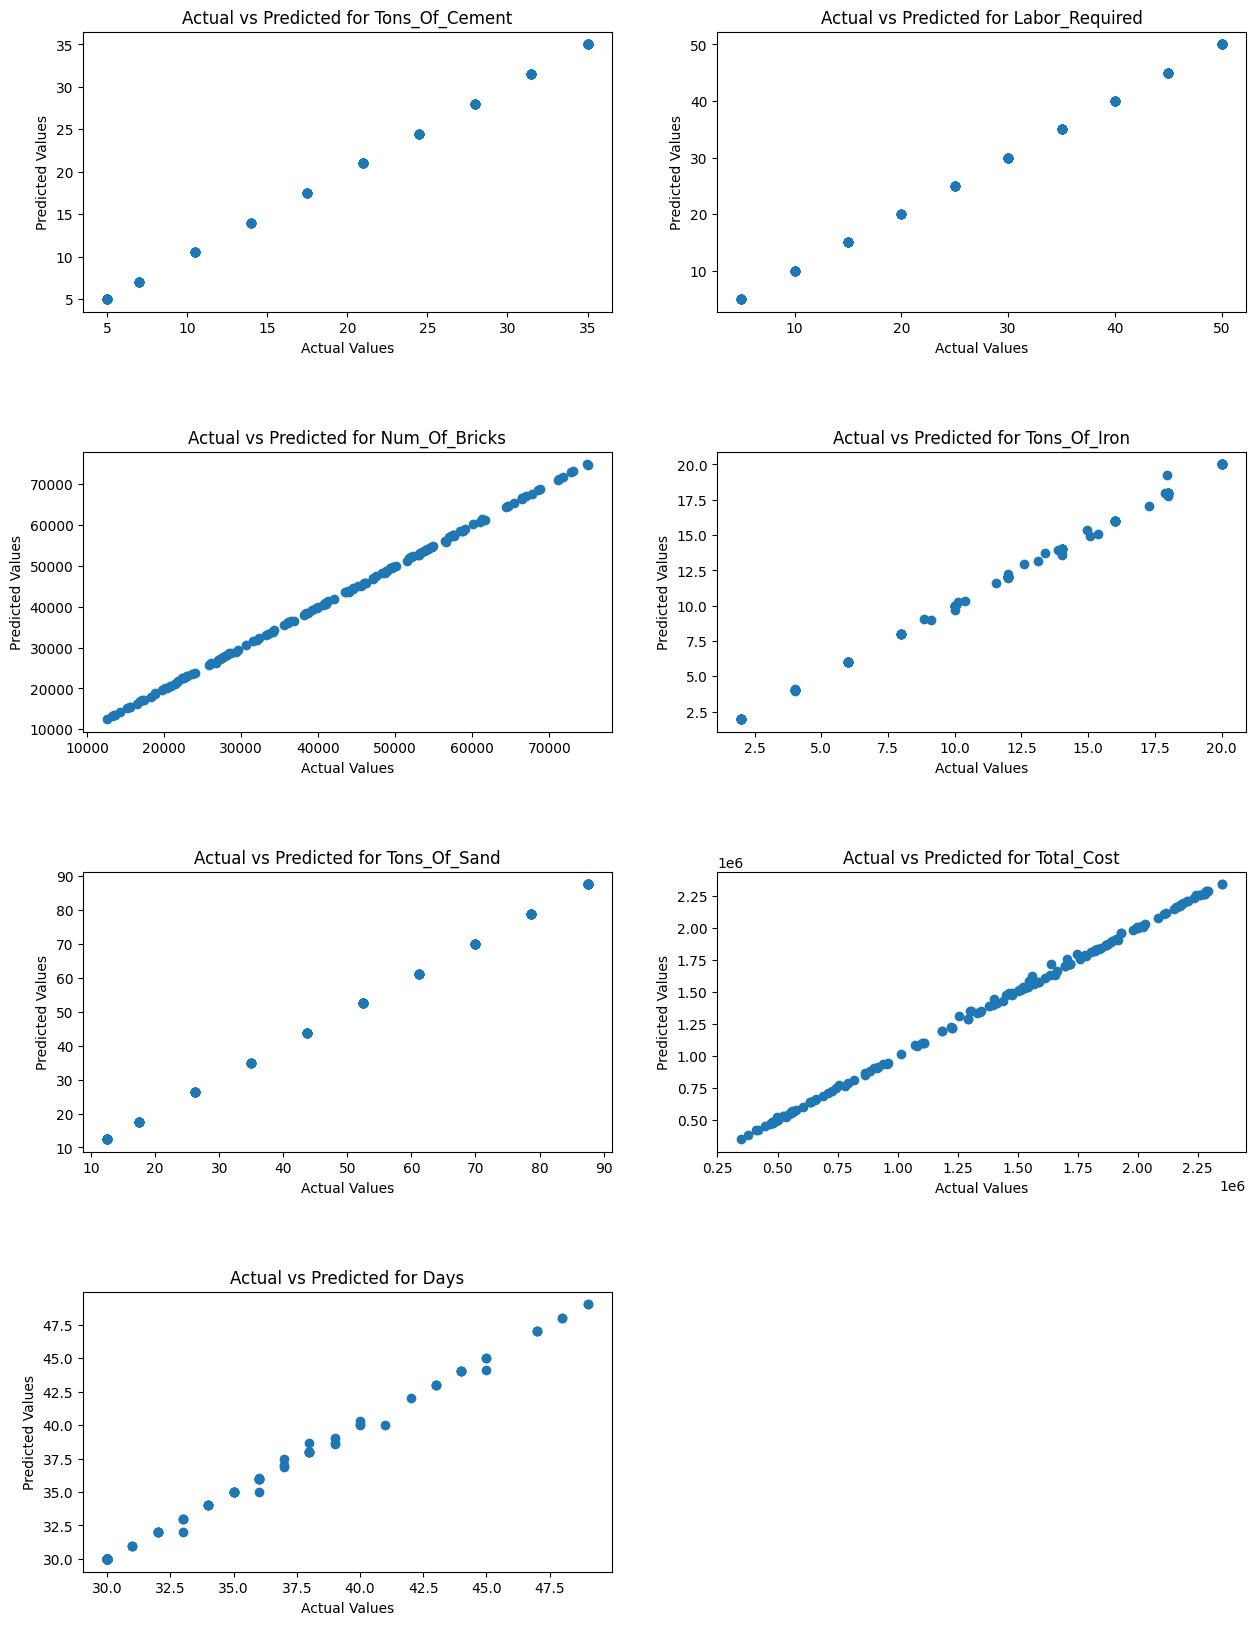

In [35]:
num_columns = len(y_test.columns)
num_rows = (num_columns + 1) // 2


fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(y_test.columns):
    ax = axes[i]
    ax.scatter(y_test[column], df_pred[column])
    ax.set_title(f'Actual vs Predicted for {column}')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')

for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

plt.show()

**Random Forest** Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
model2 = RandomForestRegressor()
model2.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
y_pred_2=model2.predict(x_test)

In [39]:
df_pred_2= pd.DataFrame(y_pred_2, columns=['Tons_Of_Cement','Labor_Required','Num_Of_Bricks','Tons_Of_Iron','Tons_Of_Sand','Total_Cost','Days'])

In [40]:
y_test

,Tons_Of_Cement,Labor_Required,Num_Of_Bricks,Tons_Of_Iron,Tons_Of_Sand,Total_Cost,Days
506,5.0,5,43586,2.00,12.50,4.977660e+05,30
357,31.5,45,68776,18.00,78.75,2.177781e+06,45
133,14.0,20,13490,8.00,35.00,8.654400e+05,30
250,31.5,45,57648,18.00,78.75,2.111013e+06,38
299,24.5,35,53742,14.00,61.25,1.695327e+06,35
...,...,...,...,...,...,...,...
462,28.0,40,53702,16.00,70.00,1.891212e+06,35
90,31.5,45,15583,10.39,78.75,1.478070e+06,30
393,31.5,45,26792,17.86,78.75,1.918957e+06,30
685,35.0,50,45537,20.00,87.50,2.234472e+06,30


Evalution Matrix

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2 = r2_score(y_test, df_pred_2)*100
print(f'Evalution Matrix with R2 is:{r2}')

Evalution Matrix with R2 is:99.86335224443837


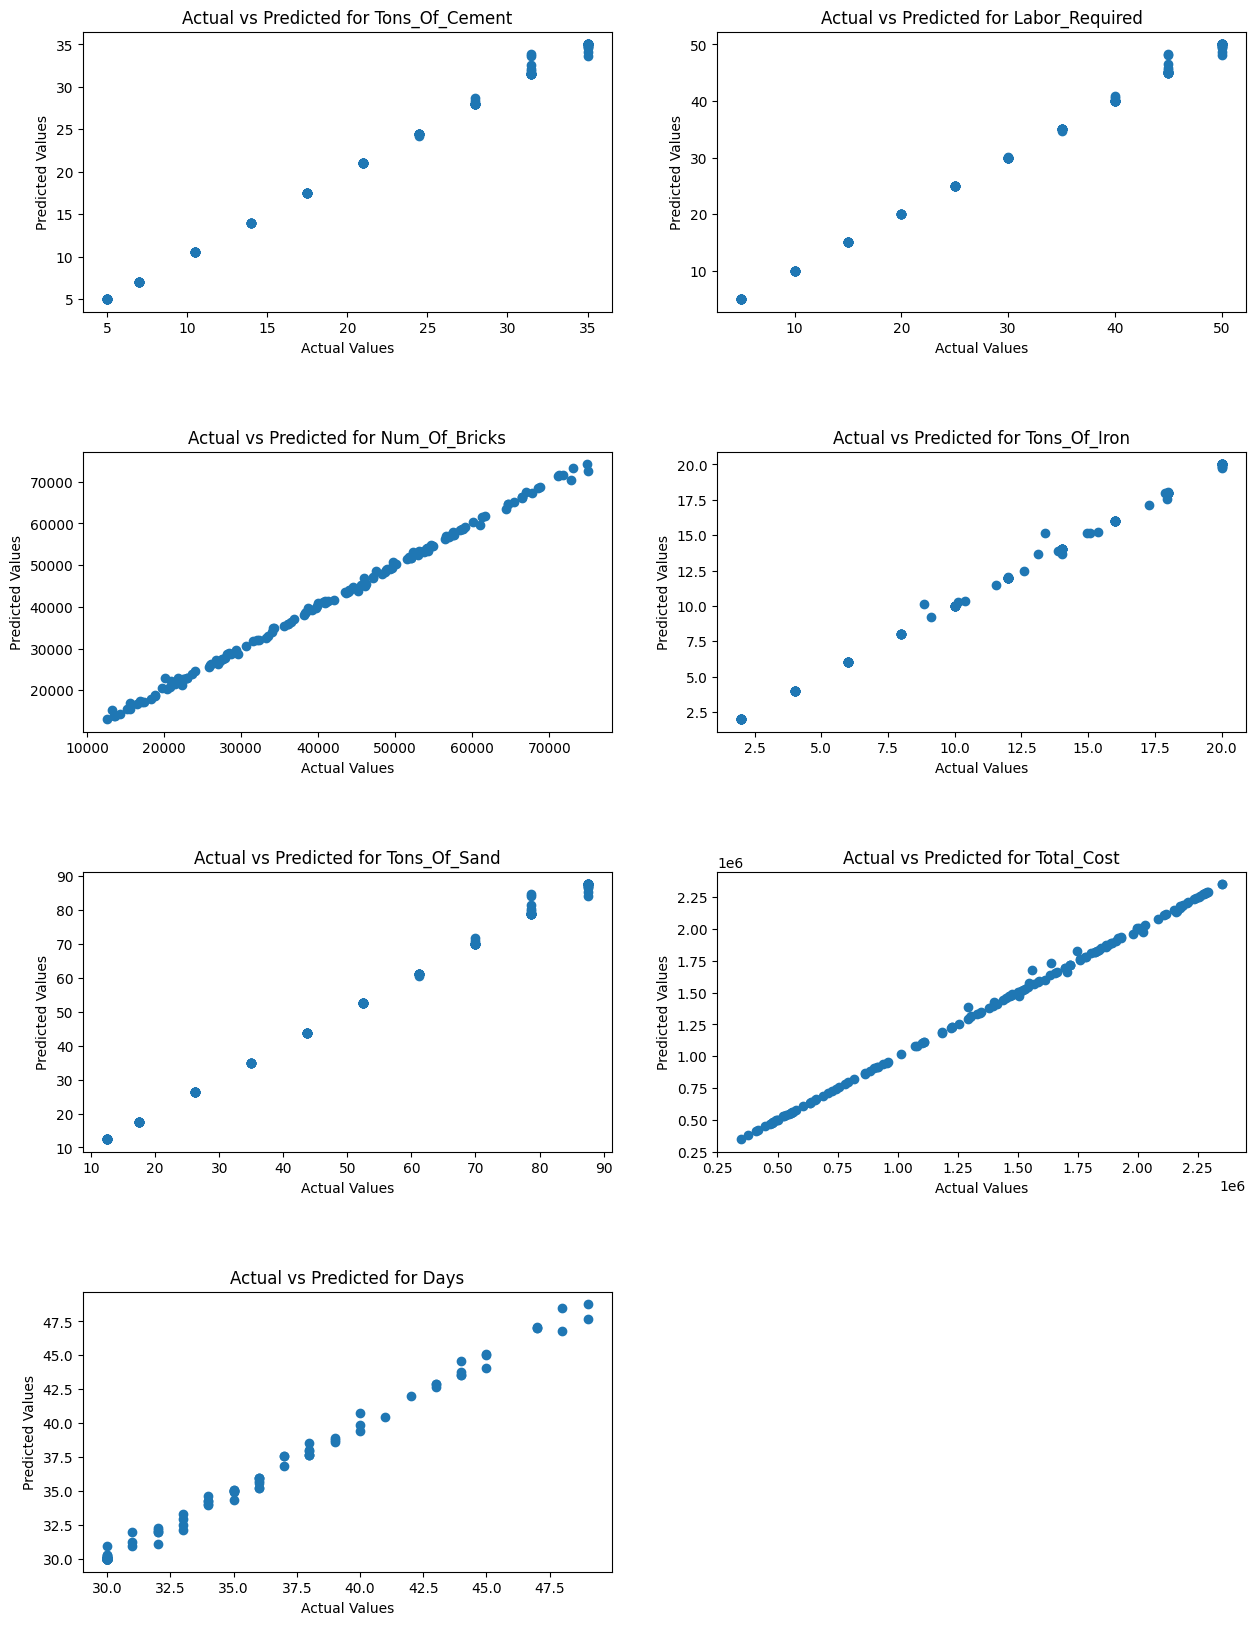

In [43]:
import matplotlib.pyplot as plt
import pandas as pd


num_columns = len(y_test.columns)
num_rows = (num_columns + 1) // 2


fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, column in enumerate(y_test.columns):
    ax = axes[i]
    ax.scatter(y_test[column], df_pred_2[column])
    ax.set_title(f'Actual vs Predicted for {column}')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')

for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

plt.show()

In [44]:
column_labels=['Tons_Of_Cement','Labor_Required','Num_Of_Bricks','Tons_Of_Iron','Tons_Of_Sand','Total_Cost','Days']
df_custom= pd.DataFrame(model2.predict([[123,4]]), columns=column_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [45]:
df_custom

,Tons_Of_Cement,Labor_Required,Num_Of_Bricks,Tons_Of_Iron,Tons_Of_Sand,Total_Cost,Days
0,14.0,20.0,13381.83,8.0,35.0,864790.98,30.0


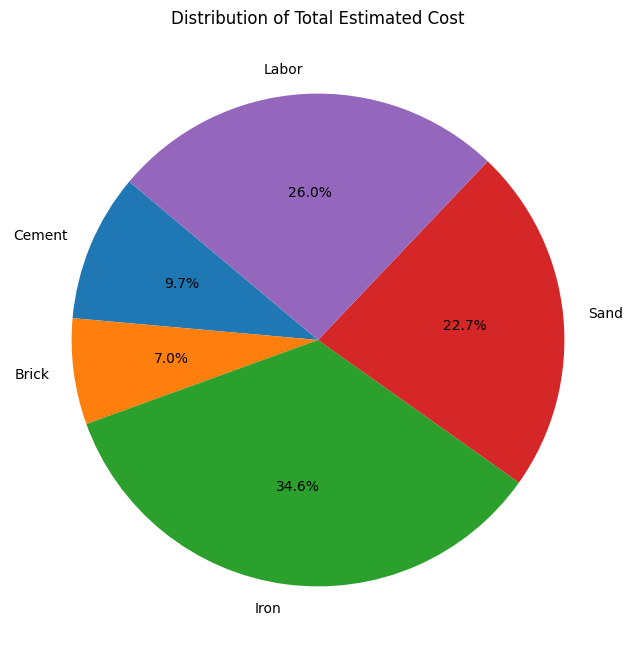

In [47]:
import matplotlib.pyplot as plt

# Given data
cost_per_ton_cement = 8000
cost_per_brick = 6
cost_per_ton_iron = 50000
cost_per_ton_sand = 7500
one_labour_one_day = 500
labels = ['Cement', 'Brick', 'Iron', 'Sand', 'Labor']

tons_cement = df_custom['Tons_Of_Cement']
labor_required = df_custom['Labor_Required']
num_bricks = df_custom['Num_Of_Bricks']
tons_iron = df_custom['Tons_Of_Iron']
tons_sand = df_custom['Tons_Of_Sand']

cement_cost = tons_cement * cost_per_ton_cement
brick_cost = num_bricks * cost_per_brick
iron_cost = tons_iron * cost_per_ton_iron
sand_cost = tons_sand * cost_per_ton_sand
labor_cost = labor_required * one_labour_one_day *df_custom['Days']


costs = [cement_cost.sum(), brick_cost.sum(), iron_cost.sum(), sand_cost.sum(), labor_cost.sum()]

plt.figure(figsize=(8, 8))
plt.pie(costs, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Estimated Cost')
plt.show()

In [48]:
import joblib

In [50]:
joblib.dump(model, 'XGB_construct_model.pkl')

['XGB_construct_model.pkl']